# Task 4 : Replicate 5 flu charts

In [292]:
# Libraries
library(reshape2)
library(ggplot2)
library("dplyr")
library("ggmap")
library("maptools")
library(maps)
library(ggplot2)
library(mapdata)

Chart 1: 
Influenza National Summary 

In [293]:
# Read the clinical lab data for 2018 - 2019
clinical <- read.csv("WHO_NREVSS_Clinical_Labs.csv", skip = 1)

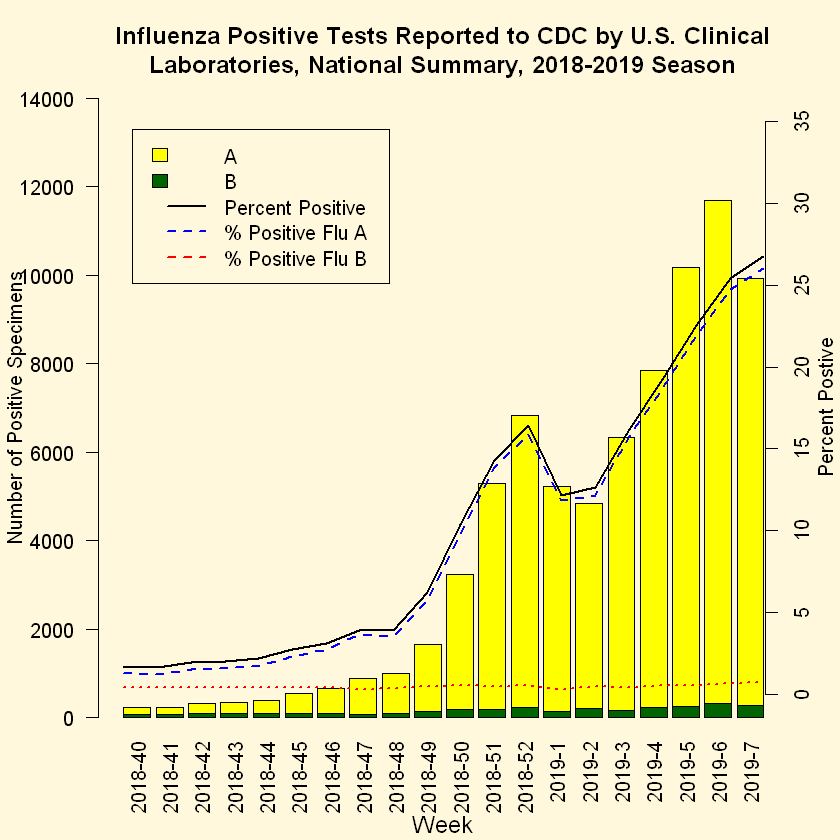

In [294]:
par(bg='cornsilk' )

barplot(clinical$TOTAL.A,
        names.arg = paste(clinical$YEAR, clinical$WEEK,sep="-"), 
        ylim = c(0,14000), col='yellow', 
        las = 2,
        ylab="Number of Positive Specimens")
title(xlab="Week", line=4, cex.lab=1.2)
par(new = T)
barplot(clinical$TOTAL.B, ylim = c(0,14000), col='darkgreen', las = 2)

par(new = T)
#Plot Percent Positive line

plot(clinical$PERCENT.A, col="blue", type="l", pch=50,lty= 2,lwd = 2, ylim=c(0, 35), axes = F, ann = F)

# Display label on right side
mtext("Percent Postive",side =4, line = 1)
axis(side=4, line = -1 )
# axis(c(40,41,42,43,44,45,46,47), side=1, at= NULL, label = TRUE)
lines(clinical$PERCENT.B, col="red", type='l', lty= 3, lwd = 2)
lines(clinical$PERCENT.POSITIVE, col ='black' , type ='l', lwd= 2)

title("Influenza Positive Tests Reported to CDC by U.S. Clinical\nLaboratories, National Summary, 2018-2019 Season")
legend("topleft", inset=0.05, c("A","B", "Percent Positive", "% Positive Flu A", "% Positive Flu B"), col = c("yellow", "darkgreen", "black", "blue", "red"), fill=c("yellow", "darkgreen", NA, NA, NA), lty = c(0,0,1,2,2), lwd = 2, border= c("black", "black", NA, NA, NA))


Chart 2: Positive Tested

In [295]:
# Read the data from public health labs
publicHealth <- read.csv("WHO_NREVSS_Public_Health_Labs.csv")

In [296]:
# Set data as a dataframe
data <- data.frame(
    A.Substring = publicHealth$A..Subtyping.not.Performed, 
    A.2009 = publicHealth$A..2009.H1N1,
    A.H3 = publicHealth$A..H3, 
    H3N2v = publicHealth$H3N2v, 
    B = publicHealth$B,
    BVic = publicHealth$BVic, 
    B.Yam = publicHealth$BYam,
    # Combine year and week
    Week = paste(publicHealth$YEAR, publicHealth$WEEK,sep="-")
)
# Melt
mdata <- melt(data, id.vars = "Week")

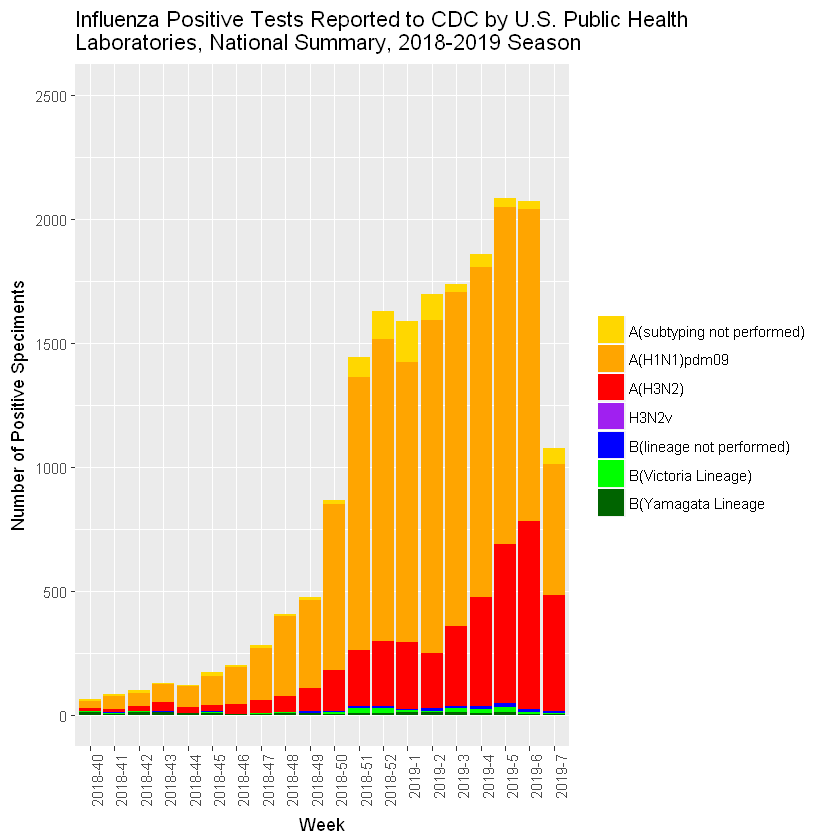

In [297]:

legendLabel = c("A(subtyping not performed)", "A(H1N1)pdm09", "A(H3N2)", "H3N2v",
                "B(lineage not performed)", "B(Victoria Lineage)", "B(Yamagata Lineage")

color = c("gold","orange", "red", "purple", "blue", "green", "darkgreen")

p <- ggplot(mdata, aes(x = Week, y = value, fill = variable)) +
    labs(title = "Influenza Positive Tests Reported to CDC by U.S. Public Health\nLaboratories, National Summary, 2018-2019 Season", 
    y = "Number of Positive Speciments") +
    scale_fill_manual(labels = legendLabel, values = color) +
    geom_bar(stat = "identity") + theme(axis.text.x = element_text(angle = 90, hjust = 1)) + 
    scale_y_continuous(limits = c(0,2500)) + 
    guides (fill = guide_legend(title = "")) 
p

Chart 3: Pediatric Deaths

In [298]:
pedDeathsRaw <- read.csv("Weekly.csv")

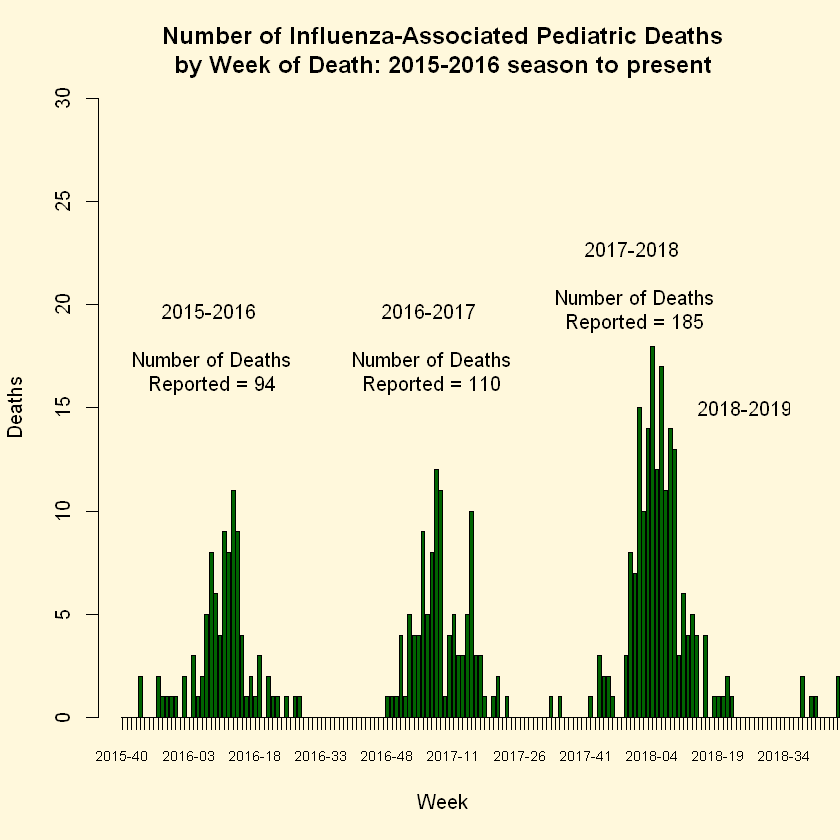

In [299]:
pedDeathsMod <- pedDeathsRaw[c(1:173),c(2:3)]

par(bg="cornsilk")
# pedDeathX <- c()
# year <- 2015
# week <- 40
# for(i in 1:35) {
#   pedDeathX[i] <- paste(year,"-",week)
#   week <- week+5
#   if(week > 52){
#     week <- week%%52;
#     year <- year+1
#   }
# }

barplot(pedDeathsMod$NO..OF.DEATHS,names.arg = pedDeathsMod$WEEK.NUMBER, cex.names=0.7, beside=T, 
        main = "Number of Influenza-Associated Pediatric Deaths\nby Week of Death: 2015-2016 season to present", 
        xlab = "Week", ylab = "Deaths", ylim=c(0,30), xlim= c(1,175), 
        axis.lty=1, col = "darkgreen")
text(25,18, labels="2015-2016 \n\nNumber of Deaths\nReported = 94")
text(85,18, labels="2016-2017 \n\nNumber of Deaths\nReported = 110")
text(140,21, labels="2017-2018 \n\nNumber of Deaths\nReported = 185")
text(170,15, labels="2018-2019")


Chart 4: Influenza Sub-type pie-charts

In [300]:
subTypeRaw <- read.csv("Genetic07.csv")

In [301]:
AH1N1 <-sum(publicHealth$A..2009.H1N1)
AH3N2 <-sum(publicHealth$A..H3)
ASub <-sum(publicHealth$A..Subtyping.not.Performed)
BVic <- sum(publicHealth$BVic)
BYam <- sum(publicHealth$BYam)
B <- sum(publicHealth$B)
p <-  c(AH1N1, AH3N2, B, ASub, BVic, BYam)

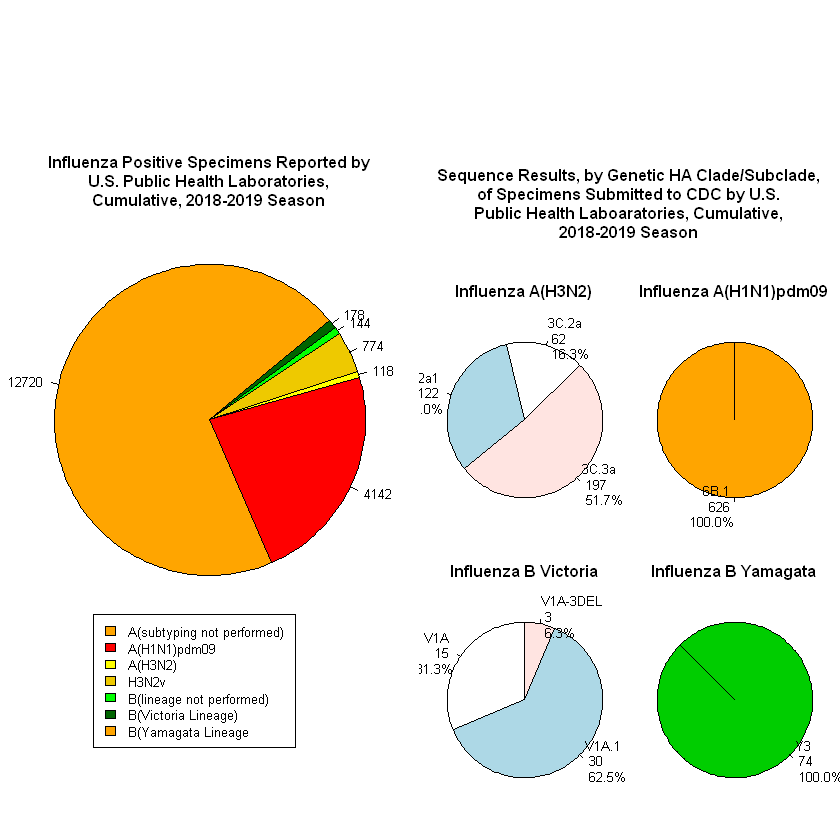

In [302]:
H3 <- subTypeRaw[c(6:8),]
H1 <- subTypeRaw[c(5),]
Victoria <- subTypeRaw[c(1:3),]
Yamagata <- subTypeRaw[c(4),]

H3Lab <- paste(H3$Sequence.Genetic.Group,"\n",H3$Distinct.count.of.Cdc.Id..,"\n",H3$X..of.Total.Distinct.count.of.Cdc.Id..)
H1Lab <- paste(H1$Sequence.Genetic.Group,"\n",H1$Distinct.count.of.Cdc.Id..,"\n",H1$X..of.Total.Distinct.count.of.Cdc.Id..)
VictoriaLab <- paste(Victoria$Sequence.Genetic.Group,"\n",Victoria$Distinct.count.of.Cdc.Id..,"\n",Victoria$X..of.Total.Distinct.count.of.Cdc.Id..)
YamagataLab <- paste(Yamagata$Sequence.Genetic.Group,"\n",Yamagata$Distinct.count.of.Cdc.Id..,"\n",Yamagata$X..of.Total.Distinct.count.of.Cdc.Id..)

par(mai=rep(0, 4))
layout(matrix(c(1,1,2,2,1,1,3,4,1,1,5,6), ncol = 4, byrow = TRUE))
pie(p, labels = p, col = c("orange", "red","yellow","gold2", "green","darkgreen"),
    radius= 0.8, init.angle = 40)
title("Influenza Positive Specimens Reported by\nU.S. Public Health Laboratories,\nCumulative, 2018-2019 Season", line = -13)
legend(-0.6,-1,legendLabel, fill = c("orange", "red","yellow","gold2", "green","darkgreen")) 
plot.new()
title("Sequence Results, by Genetic HA Clade/Subclade,\nof Specimens Submitted to CDC by U.S.\nPublic Health Laboaratories, Cumulative,\n2018-2019 Season", line = -15)

pie(H3$Distinct.count.of.Cdc.Id.., labels=H3Lab, main ="\nInfluenza A(H3N2)", init.angle = 45)
pie(H1$Distinct.count.of.Cdc.Id.., labels=H1Lab, col='orange', main ="\nInfluenza A(H1N1)pdm09", init.angle = 90)
pie(Victoria$Distinct.count.of.Cdc.Id.., labels=VictoriaLab,  main ="\nInfluenza B Victoria", init.angle= 90)
pie(Yamagata$Distinct.count.of.Cdc.Id.., labels=YamagataLab, col='green3',  main ="\nInfluenza B Yamagata", init.angle = 135)

Chart 5: HeatMap

In [303]:
# Enter Google API key
API_KEY = ""

In [304]:
register_google(key = API_KEY)

USData <- read.csv("StateDatabyWeekforMap_2018-19week40-4.csv")

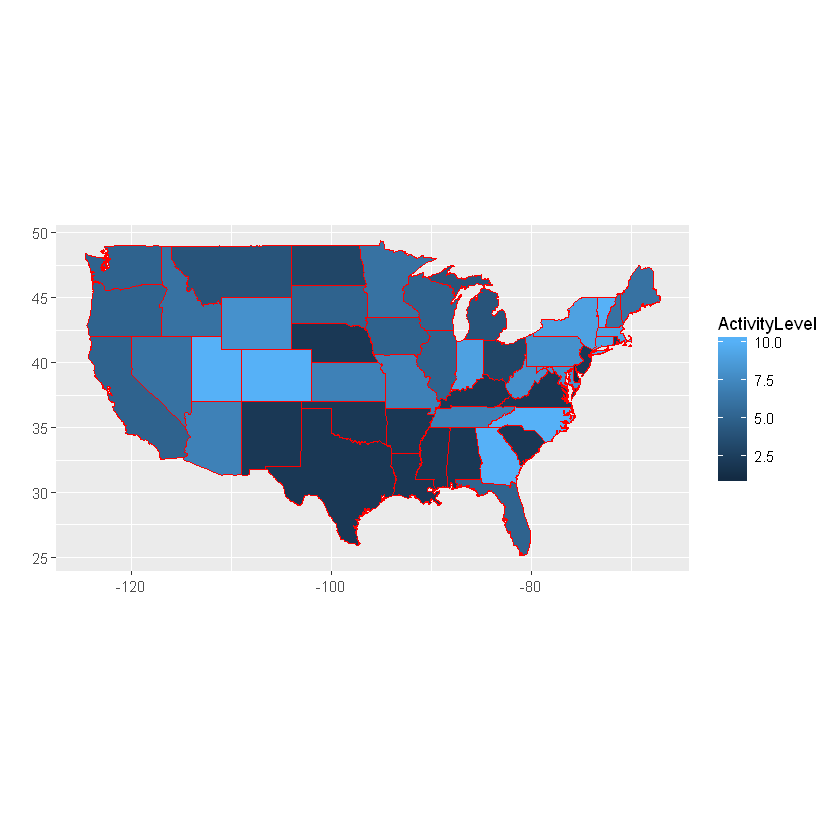

In [305]:
stateData <- USData[c(865:917),c(1,4)]

data <- data.frame(ActivityLevel = as.numeric(stateData$ACTIVITY.LEVEL), region = tolower(stateData$STATENAME))
usa <- map_data("state")

join <- merge(data, usa, by = "region")

ggplot() + 
  geom_polygon(data = join, aes(fill=ActivityLevel, x=long, y = lat, group = group), color = "red") + 
    labs(x = "", y = "") +
  coord_fixed(1.3)